# Generating the SuperScreen logo

The `SuperScreen` logo is a superconducting "S" screening a uniform applied magnetic field. This notebook generates the logo as follows:

1. Define a `matplotlib` `TextPath` object and use it to extract polygon vertices that draw an "S".
2. Create a `superscreen.Device` to represent the superconducting "S".
3. Solve for the response of the "S" to an applied magnetic field.
4. Visualize the resulting screening currents and fields.

In [1]:
# Automatically install superscreen from GitHub only if running in Google Colab
if "google.colab" in str(get_ipython()):
    %pip install --quiet git+https://github.com/loganbvh/superscreen.git

In [2]:
%config InlineBackend.figure_formats = {"retina", "png"}
%matplotlib inline

import os

os.environ["OPENBLAS_NUM_THREADS"] = "1"

import numpy as np
from matplotlib.textpath import TextPath
from matplotlib.font_manager import FontProperties

import superscreen as sc

SAVE = False

In [3]:
sc.version_table()

Software,Version
SuperScreen,0.12.0
Numpy,1.23.3
Numba,0.57.0
SciPy,1.9.1
matplotlib,3.6.0
IPython,8.5.0
Python,"3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:01:00) [Clang 13.0.1 ]"
OS,posix [darwin]
Number of CPUs,"Physical: 10, Logical: 10"
BLAS Info,OPENBLAS


Define the `TextPath`:

In [4]:
fontprops = FontProperties(weight="bold", family="sans-serif")
path = TextPath((0, 0), "S", size=10, prop=fontprops)

Sample each of the `TextPath`'s Bezier curves to get polygon vertices:

In [5]:
t = np.linspace(0, 1, 16)
segments = [bezier(t) for bezier, _ in path.iter_bezier()]
points = np.concatenate(segments)

Center the resulting points and remove duplicates:

In [6]:
points -= points.mean(axis=0)
_, ix = np.unique(points, axis=0, return_index=True)
points = points[np.sort(ix)]

Create and plot a `superscreen.Polygon` representing the "S":

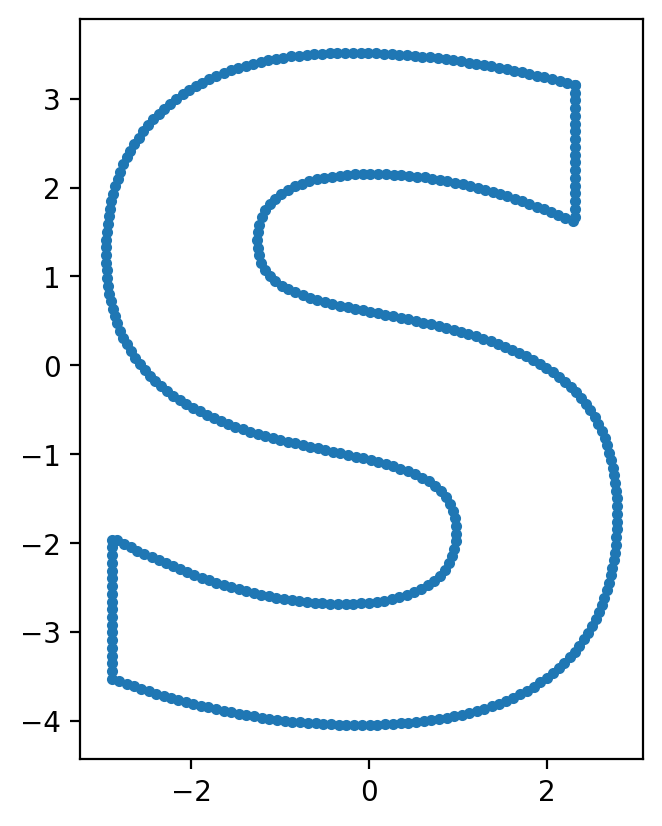

In [7]:
S = sc.Polygon(points=points).resample()
ax = S.plot(marker=".")

Create a `Device` containing the `Polygon`:

In [8]:
layers = [sc.Layer("base", Lambda=1, z0=0)]
S.layer = "base"
S.name = "S"
device = sc.Device("S", layers=layers, films=[S])

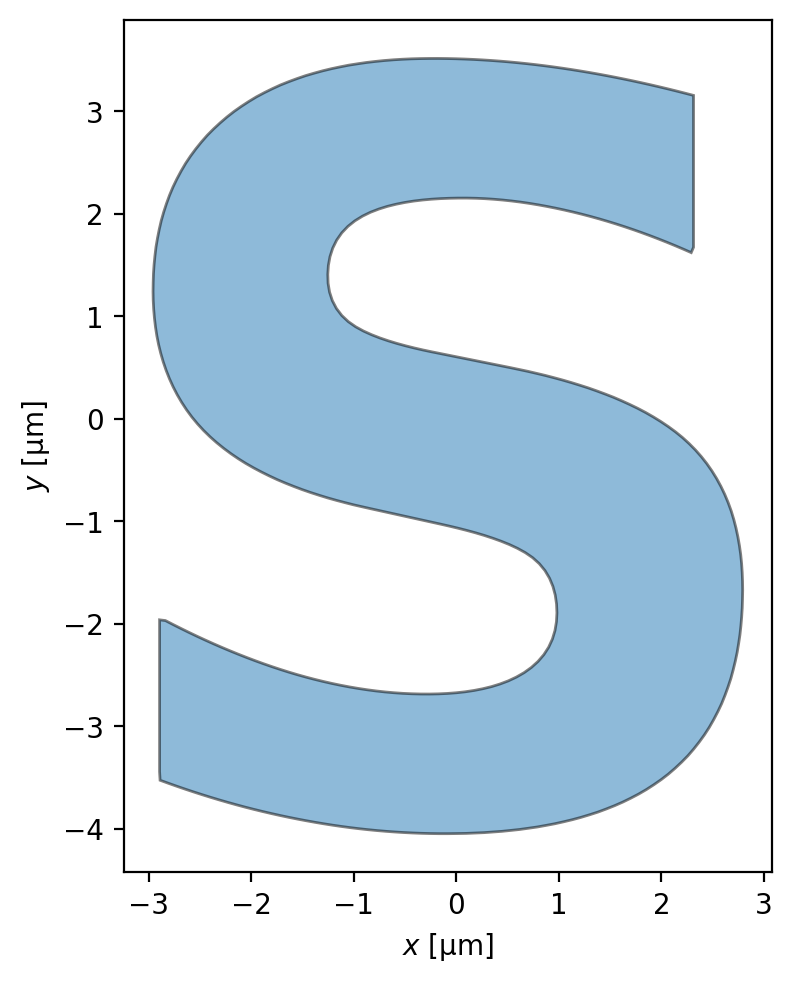

In [9]:
fig, ax = device.draw()

In [10]:
device.make_mesh(max_edge_length=0.12, smooth=100)

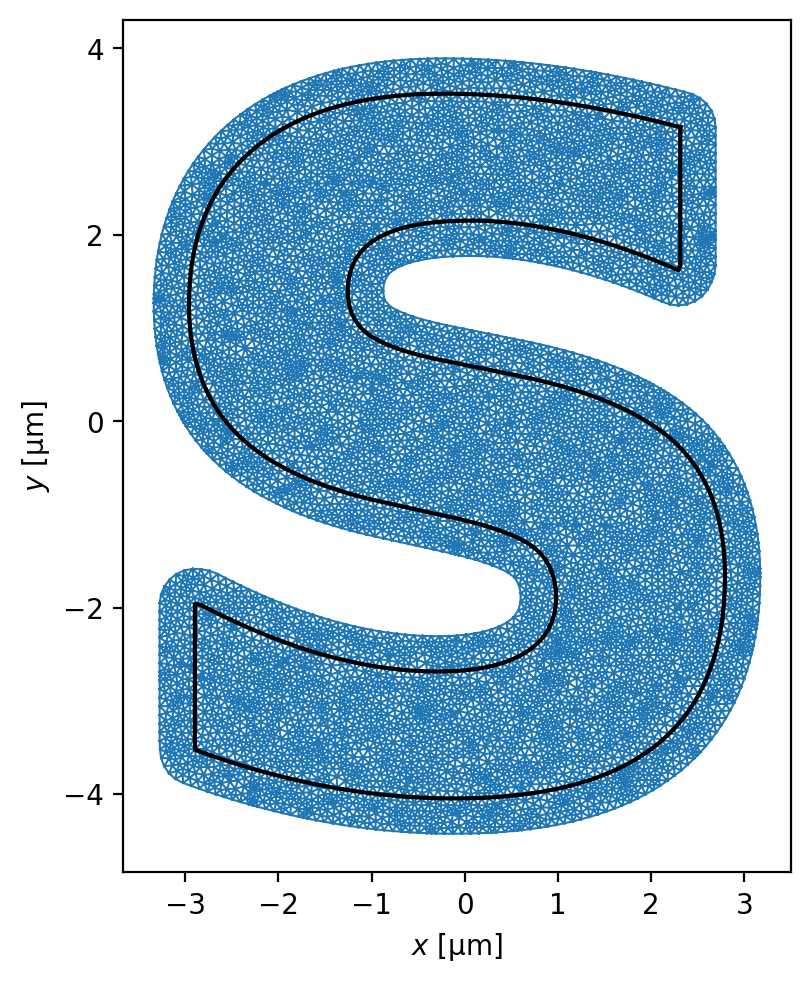

In [11]:
fig, ax = device.plot_mesh(show_sites=False)
_ = device.plot_polygons(ax=ax, color="k")

Solve for the `Device`'s response to a constant applied field:

In [12]:
solutions = sc.solve(
    device=device,
    applied_field=sc.sources.ConstantField(1),
    field_units="mT",
    current_units="uA",
)

Plot and save the results:

In [13]:
fig_formats = ["png"]

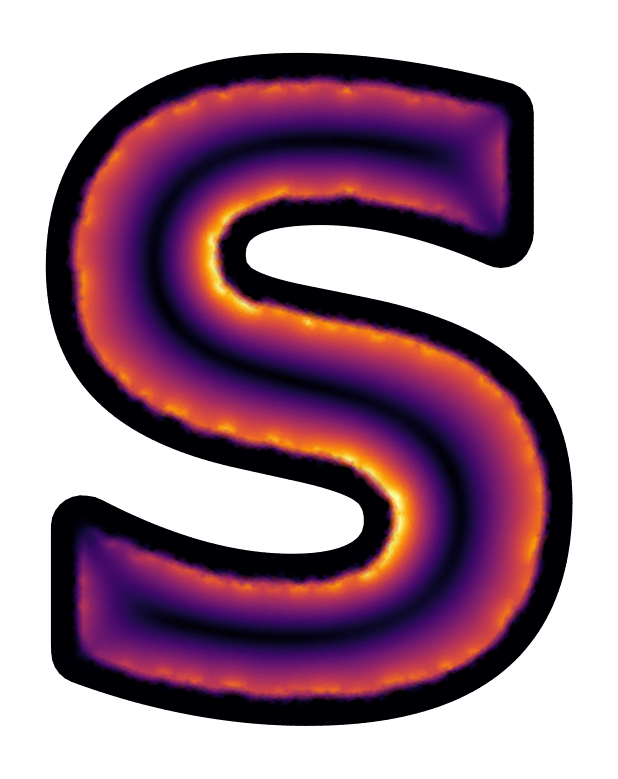

In [14]:
fig, axes = solutions[-1].plot_currents(
    vmin=0,
    vmax=750,
    streamplot=False,
    colorbar=False,
    shading="gouraud",
)

for a in axes:
    a.axis("off")
    a.set_title("")

if SAVE:
    fig.set_facecolor("none")
    for fmt in fig_formats:
        fig.savefig(f"../images/logo_currents.{fmt}", dpi=600, bbox_inches="tight")

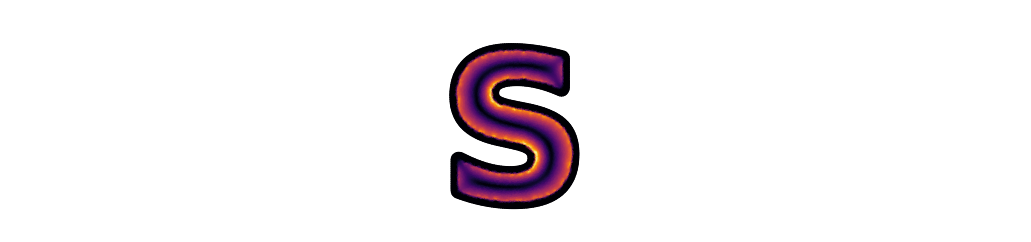

In [15]:
fig, axes = solutions[-1].plot_currents(
    streamplot=False,
    vmin=0,
    vmax=750,
    shading="gouraud",
    colorbar=False,
)

for a in axes:
    a.axis("off")
    a.set_title("")
    a.set_xlim(-25, 25)
    a.set_ylim(-5.1, 5.1)

if SAVE:
    fig.set_facecolor("none")
    for fmt in fig_formats:
        fig.savefig(
            f"../images/logo_currents_small.{fmt}", dpi=600, bbox_inches="tight"
        )

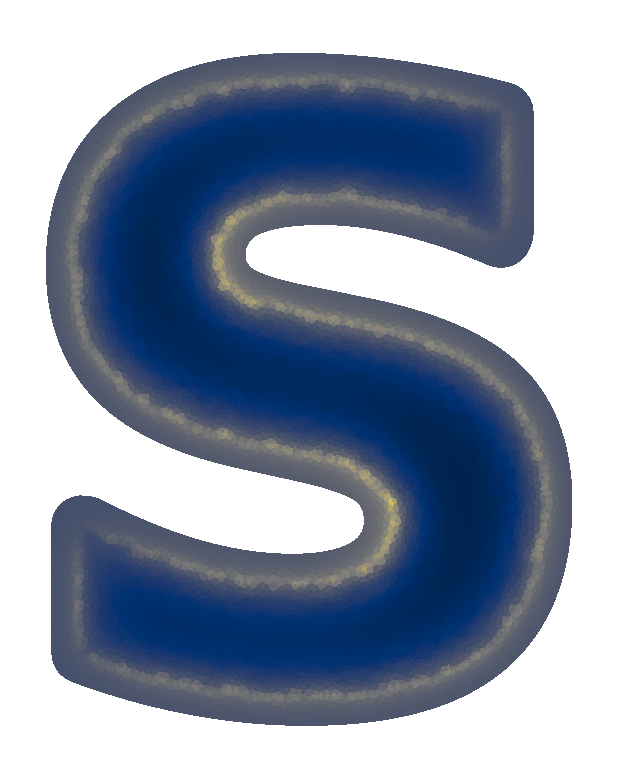

In [16]:
fig, axes = solutions[-1].plot_fields(colorbar=False)

for a in axes:
    a.axis("off")
    a.set_title("")

if SAVE:
    fig.set_facecolor("none")
    for fmt in fig_formats:
        fig.savefig(f"../images/logo_fields.{fmt}", dpi=600, bbox_inches="tight")

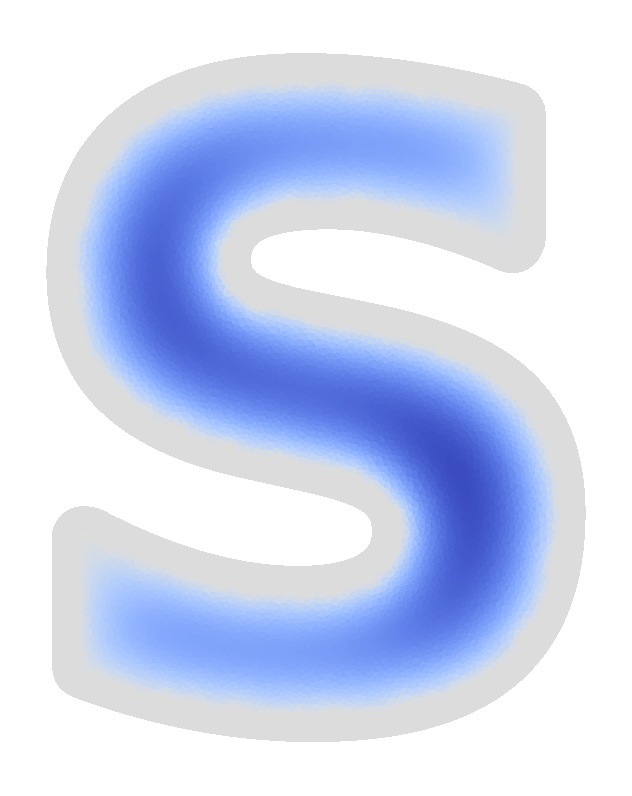

In [17]:
fig, axes = solutions[-1].plot_streams(colorbar=False)

for a in axes:
    a.axis("off")
    a.set_title("")

if SAVE:
    fig.set_facecolor("none")
    for fmt in fig_formats:
        fig.savefig(f"../images/logo_streams.{fmt}", dpi=600, bbox_inches="tight")

In [18]:
device = sc.Device(
    "S",
    layers=layers,
    films=[S],
    terminals={
        "S": [
            sc.Polygon("source", points=sc.geometry.box(0.1, 2, center=(2.31, 2.4))),
            sc.Polygon("drain", points=sc.geometry.box(0.1, 2, center=(-2.9, -2.8))),
        ],
    },
)

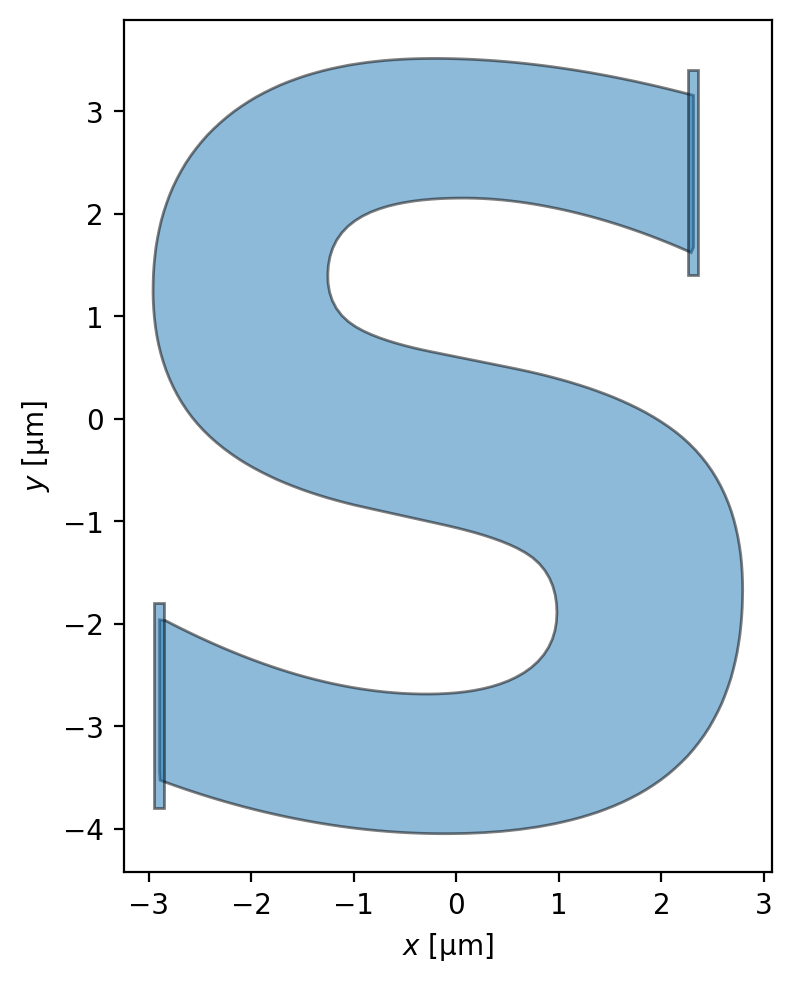

In [19]:
_ = device.draw()

In [20]:
device.make_mesh(max_edge_length=0.2, smooth=0)

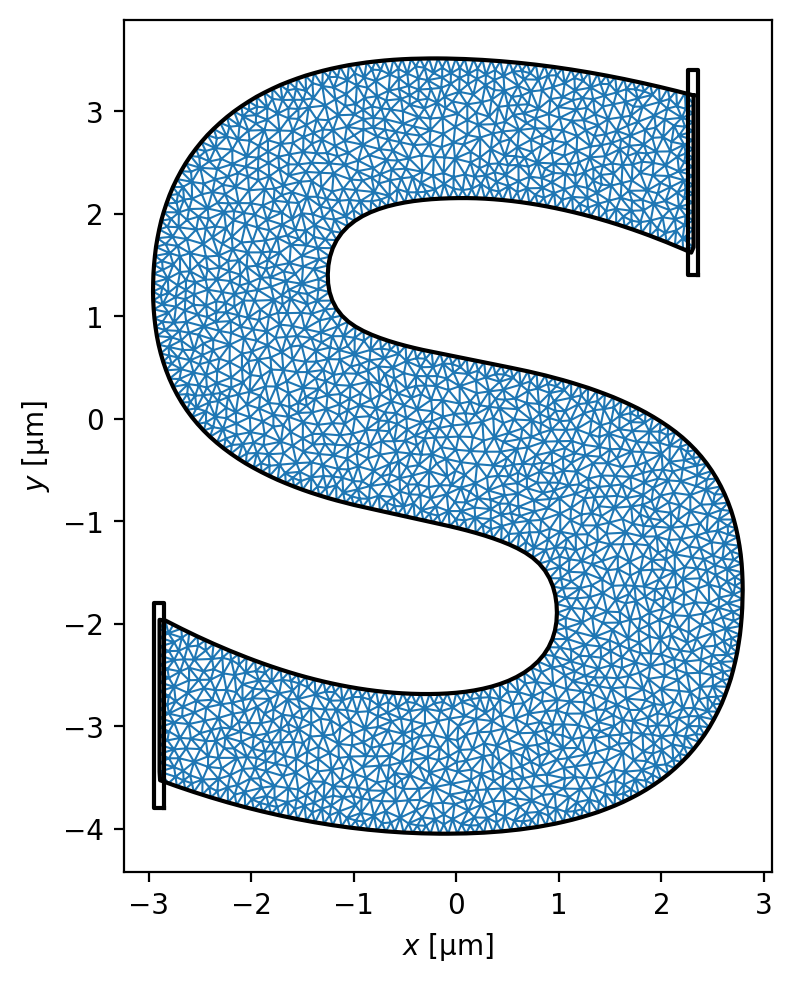

In [21]:
fig, ax = device.plot_mesh(show_sites=False)
_ = device.plot_polygons(ax=ax, color="k")

In [22]:
solutions = sc.solve(device, terminal_currents={"S": {"source": "10 uA", "drain": "-10 uA"}})

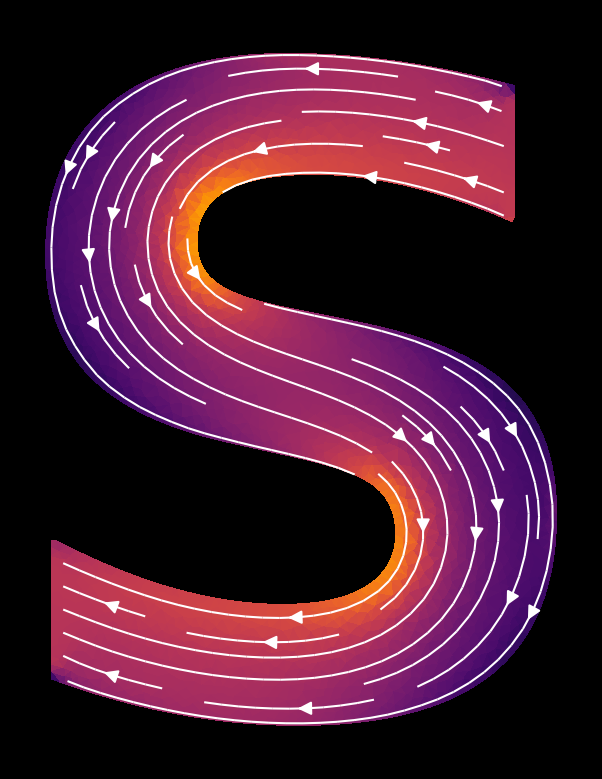

In [23]:
fig, axes = solutions[-1].plot_currents(
    grid_shape=500,
    streamplot=True,
    colorbar=False,
    vmin=0,
    vmax=15,
)
fig.set_facecolor("k")

for a in axes:
    a.axis("off")
    a.set_title("")

if SAVE:
    for fmt in fig_formats:
        fig.savefig(
            f"../images/logo_terminal_currents.{fmt}", dpi=600, bbox_inches="tight"
        )

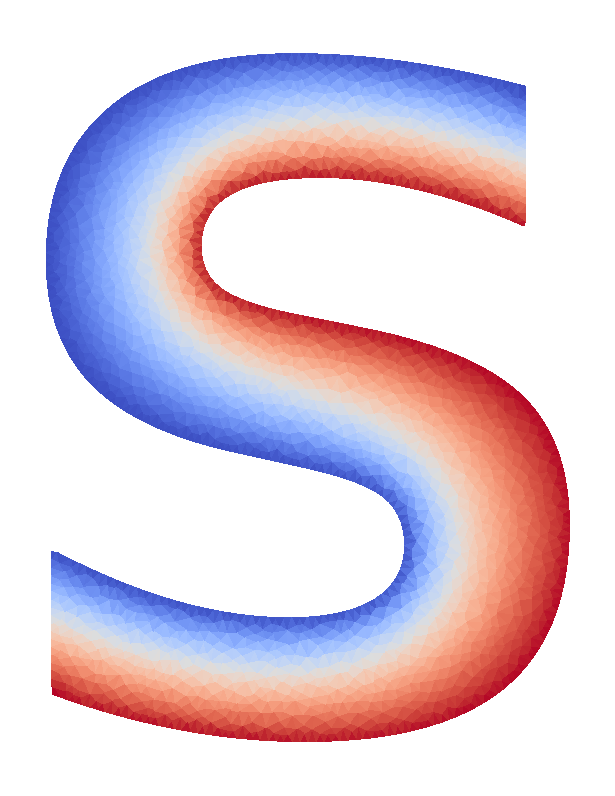

In [24]:
fig, axes = solutions[-1].plot_streams(colorbar=False)

for a in axes:
    a.axis("off")
    a.set_title("")

if SAVE:
    fig.set_facecolor("none")
    for fmt in fig_formats:
        fig.savefig(
            f"../images/logo_terminal_streams.{fmt}", dpi=600, bbox_inches="tight"
        )